# Polynomial regression

This notebook is practice and experiments with polynomial regression

## Linear regression with x^2 and x^3 features

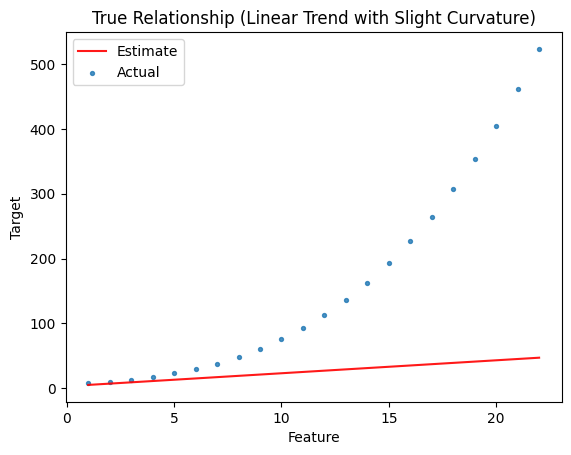

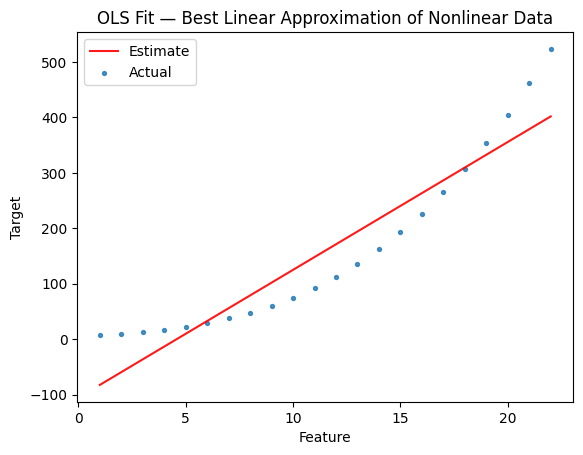

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from mlpeople.models.linear import plot_1d_predictions
from mlpeople.models.linear import fit_ols

# True parameters of the underlying relationship
b_true = 3   # intercept
w_true = 2   # slope

# Generate feature values (19 samples, 1 feature)
# We reshape to (n,1) because most ML models expect a 2D feature matrix
xs = np.arange(1, 23).reshape(-1, 1)

# Create a slightly nonlinear relationship:
# linear trend + small quadratic and cubic terms to introduce curvature
ys = w_true*xs + b_true + 0.1*(xs**2) + 0.04*(xs**3)

# Add Gaussian noise to simulate real-world data imperfections
noise = np.random.normal(loc=0, scale=4, size=xs.shape[1])  
ys_noisy = ys + noise

plot_1d_predictions(
    xs[:, 0],
    ys_noisy,
    w_true,
    b=b_true,
    title='True Relationship (Linear Trend with Slight Curvature)'
);

# Fit an Ordinary Least Squares (OLS) regression model.
# Note: OLS assumes a linear relationship, so it will try to
# approximate the curved data with the best straight line.
beta_ols = fit_ols(xs, ys, fit_intercept=True)

plot_1d_predictions(
    xs[:, 0],
    ys_noisy,
    beta_ols[1],
    b=beta_ols[0],
    title='OLS Fit — Best Linear Approximation of Nonlinear Data'
);


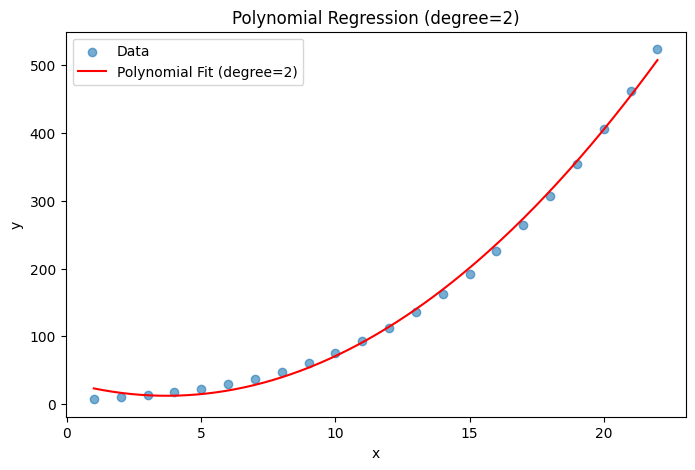

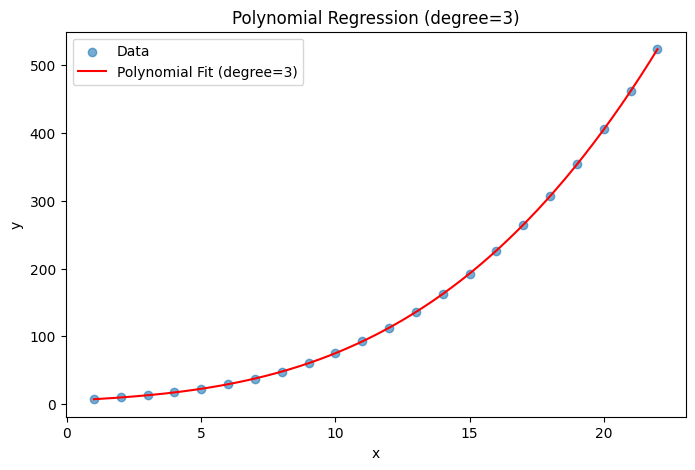

beta_2: [[ 32.7284506]
 [-10.98     ]
 [  1.48     ]]
beta_3: [[5.1284506]
 [2.       ]
 [0.1      ]
 [0.04     ]]


In [3]:
from mlpeople.models.linear import plot_polynomial_fit_1d

# adds x^2 as second feature, fit ols, predicts and plot fit line
beta_2 = plot_polynomial_fit_1d(xs, ys_noisy, degree=2)

# adds x^2 and x^3 as features, fit ols, predicts and plot fit line
beta_3 = plot_polynomial_fit_1d(xs, ys_noisy, degree=3)

print(f'beta_2: {beta_2}')
print(f'beta_3: {beta_3}')

In [ ]:
# TOdo